# Practical example: Logistic Regression

### Multinomial Classification

Import required libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

Generate the data randomly, defining three centers on which the datasets to be classified will be
generated, since we will try to categorize the data into three different categories or subsets.

In [3]:

# Randomly generate data
# define centroids

centers = [[-5,0], [0,1.5], [5,-1]]
# use make blobs to generate data
X, y = make_blobs(n_samples=1000, centers = centers, random_state=40)
transformation = [[0.4,0.2], [-0.4,1.2]]
Xa = np.dot(X, transformation)

Next, define the “multinomial” type predictor and train it.

In [4]:
# define multinomial type predictor and train it
multiclass = 'multinomial'
regressor = LogisticRegression(solver='sag',
                               max_iter=100,
                               random_state=42,
                               multi_class=multiclass).fit(X,y)


Next, represent the classification obtained by the classifier.
1. Generate the desired grid between the maximum and minimum value with a step of 0.02.
2. Calculate the decision boundary that divides the underlying vector space into three sets.
3. Visualize the training points and the decision boundaries that divide the sets, classifying
them into the three classes that we are looking for.

<ipython-input-5-195a76f6be22>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx,1], c=color, cmap=plt.cm.Paired, edgecolor='black', s=20)


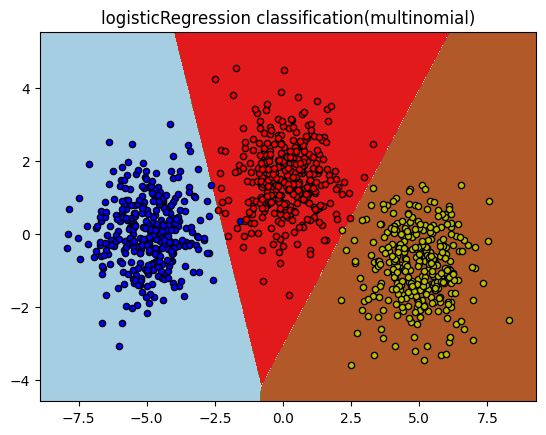

In [5]:

"""
Generate desired grid b/w max and min value with step of 0.02
calculate decision boundary that divides underlying vector space into 3 sets
visualize training points and decision boundaries that divide the sets
"""
# Create a mesh to plot in
h = 0.02 #step size
x_min, x_max, = X[:,0].min() -1, X[:,0].max() + 1
y_min, y_max, = X[:,1].min() -1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min,x_max, h), np.arange(y_min, y_max, h))

#plot decision boundary
Z = regressor.predict(np.c_[xx.ravel(), yy.ravel()])

#put result into color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("logisticRegression classification(%s)" % multiclass)
plt.axis('tight')

#draw training points
colors = 'bry'
for i, color in zip(regressor.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx,1], c=color, cmap=plt.cm.Paired, edgecolor='black', s=20)

plt.show()




























